
# 📊 M4.1 Matplotlib 基本圖形語法

本課程介紹Python最流行的視覺化庫Matplotlib的基礎知識。Matplotlib是Python數據可視化的基石，提供了豐富的API用於創建各種靜態、動態和互動式圖表。我們將探索其核心概念、基本語法和常見使用場景，為後續更複雜的資料視覺化奠定基礎。


## 🎯 教學目標

- 🔍 了解Matplotlib的架構和核心概念
- 📈 掌握Figure和Axes對象的基本操作方法
- 🎨 學習基本圖形繪製與自定義技巧
- 🧩 掌握多子圖和組合圖表的創建方法

In [51]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import warnings

# 忽略警告信息
warnings.filterwarnings('ignore')

# 設置中文字體支持 (如果系統支持)
try:
    plt.rcParams['font.family'] = ['Microsoft JhengHei']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 100)

# 設置隨機種子確保結果可重現
np.random.seed(42)


## 📊 1. Matplotlib 架構與基本概念

Matplotlib的設計理念源自MATLAB，提供了兩種主要的使用界面：

- **pyplot界面**：類似MATLAB的簡便命令式接口，適合快速繪圖
- **面向對象界面**：提供更精細的控制，適合複雜圖表和自定義需求

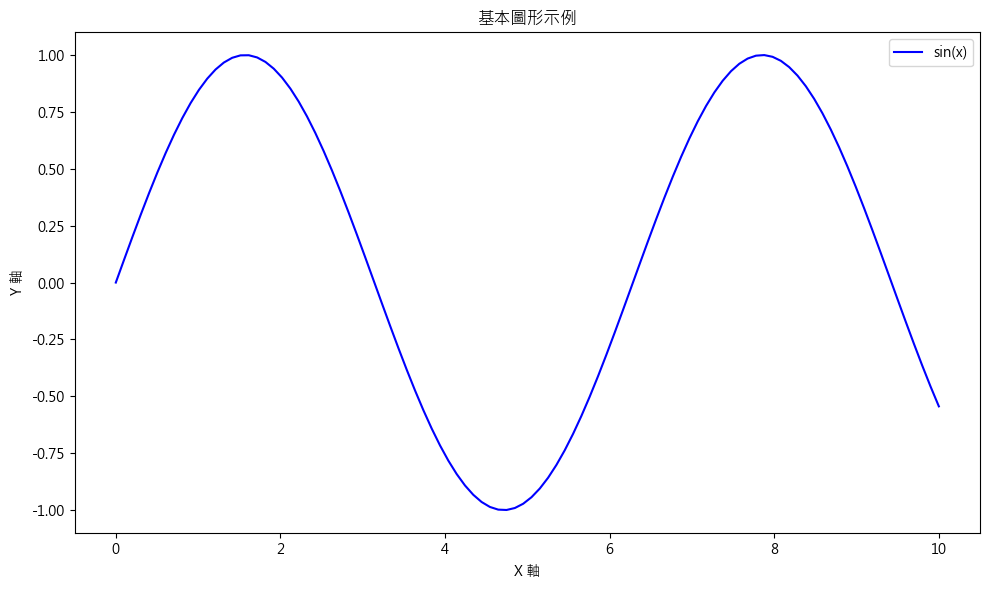

In [52]:
# 1.1 Figure 和 Axes 對象
# Figure是整個圖形窗口，Axes是圖形中包含數據的區域

# 創建一個簡單的圖形
fig = plt.figure(figsize=(10, 6))  # 創建一個Figure對象，指定大小
ax = fig.add_subplot(111)  # 在Figure上添加一個Axes (子圖)

# 在Axes上繪製數據
x = np.linspace(0, 10, 100)
y = np.sin(x)
ax.plot(x, y, 'b-', label='sin(x)')
ax.set_xlabel('X 軸')
ax.set_ylabel('Y 軸')
ax.set_title('基本圖形示例')
ax.legend()

plt.tight_layout()
plt.show()

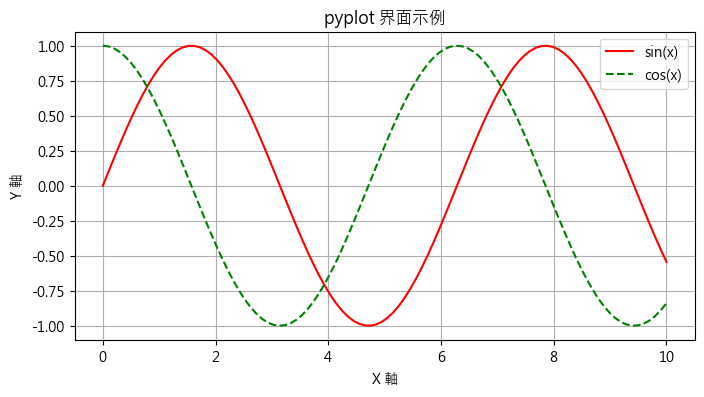

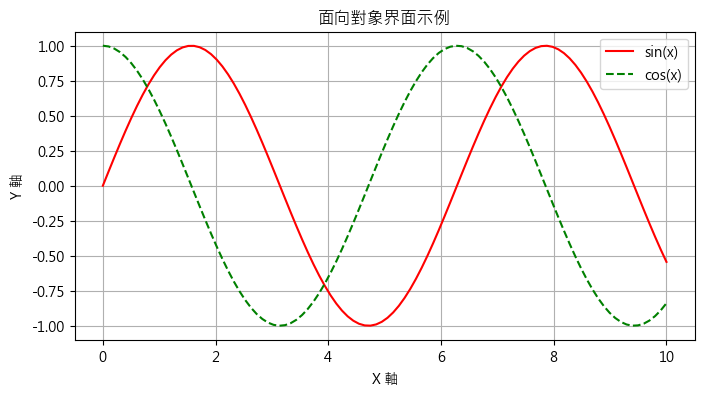

In [53]:
# 1.2 pyplot 界面與面向對象界面對比

# pyplot界面 (簡便但控制有限)
plt.figure(figsize=(8, 4))
plt.plot(x, np.sin(x), 'r-', label='sin(x)')
plt.plot(x, np.cos(x), 'g--', label='cos(x)')
plt.xlabel('X 軸')
plt.ylabel('Y 軸')
plt.title('pyplot 界面示例')
plt.legend()
plt.grid(True)
plt.show()

# 面向對象界面 (更靈活，適合複雜圖表)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, np.sin(x), 'r-', label='sin(x)')
ax.plot(x, np.cos(x), 'g--', label='cos(x)')
ax.set_xlabel('X 軸')
ax.set_ylabel('Y 軸')
ax.set_title('面向對象界面示例')
ax.legend()
ax.grid(True)
plt.show()

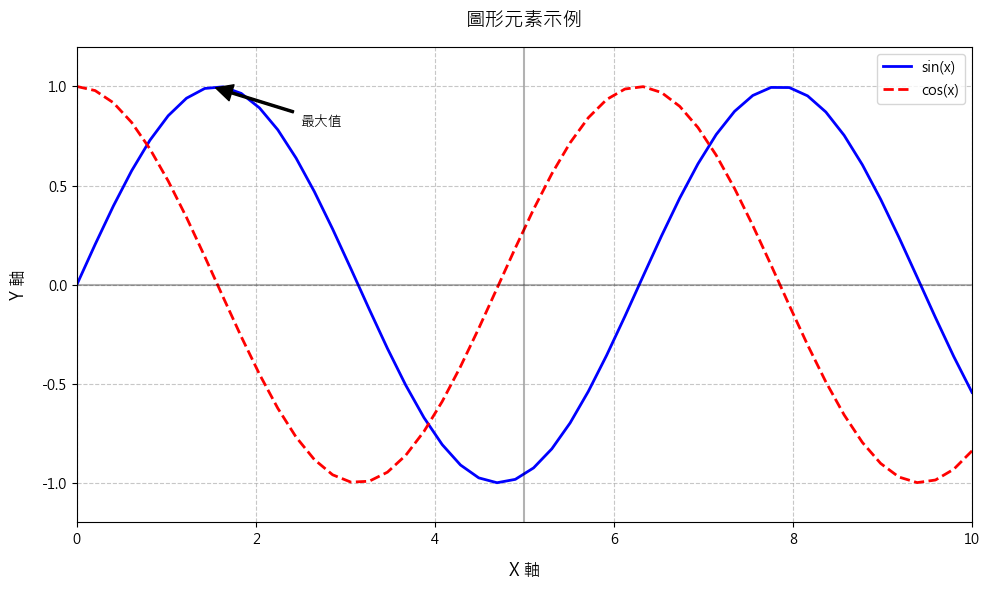

In [54]:
# 1.3 圖形元素解析
# 創建一個示例圖形，標註各個組成部分
fig, ax = plt.subplots(figsize=(10, 6))

# 繪製一些示例數據
x = np.linspace(0, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
ax.plot(x, y1, 'b-', linewidth=2, label='sin(x)')
ax.plot(x, y2, 'r--', linewidth=2, label='cos(x)')

# 設置標題和標簽
ax.set_title('圖形元素示例', fontsize=14, pad=15)
ax.set_xlabel('X 軸', fontsize=12, labelpad=10)
ax.set_ylabel('Y 軸', fontsize=12, labelpad=10)

# 設置刻度和網格
ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.grid(True, linestyle='--', alpha=0.7)

# 添加圖例
ax.legend(loc='upper right', fontsize=10, frameon=True)

# 添加文本註釋
ax.annotate('最大值', xy=(1.5, 1.0), xytext=(2.5, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            fontsize=10)

# 設置軸範圍
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)

# 添加水平和垂直線
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=5, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 2. 基本圖形繪製

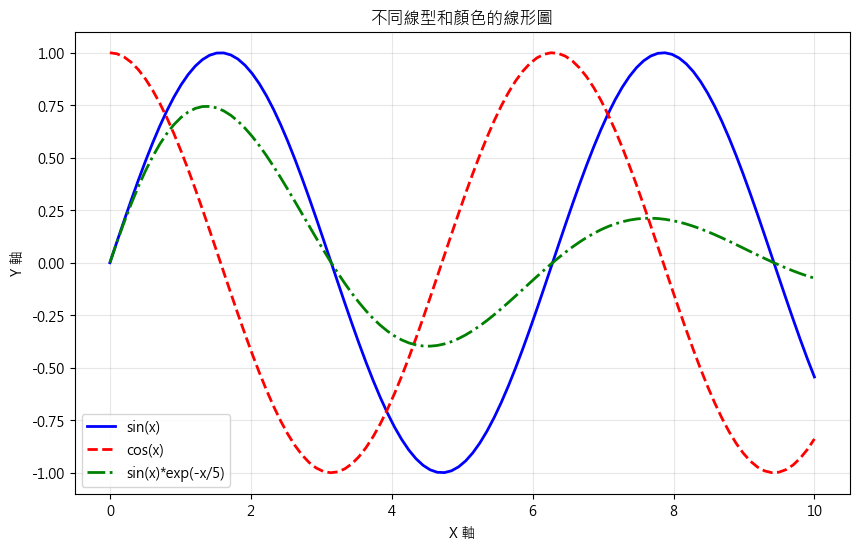

In [55]:
# 2.1 線形圖 (Line Plot)
# 創建示例數據
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(-x/5)

plt.figure(figsize=(10, 6))
plt.plot(x, y1, 'b-', label='sin(x)', linewidth=2)
plt.plot(x, y2, 'r--', label='cos(x)', linewidth=2)
plt.plot(x, y3, 'g-.', label='sin(x)*exp(-x/5)', linewidth=2)

plt.xlabel('X 軸')
plt.ylabel('Y 軸')
plt.title('不同線型和顏色的線形圖')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

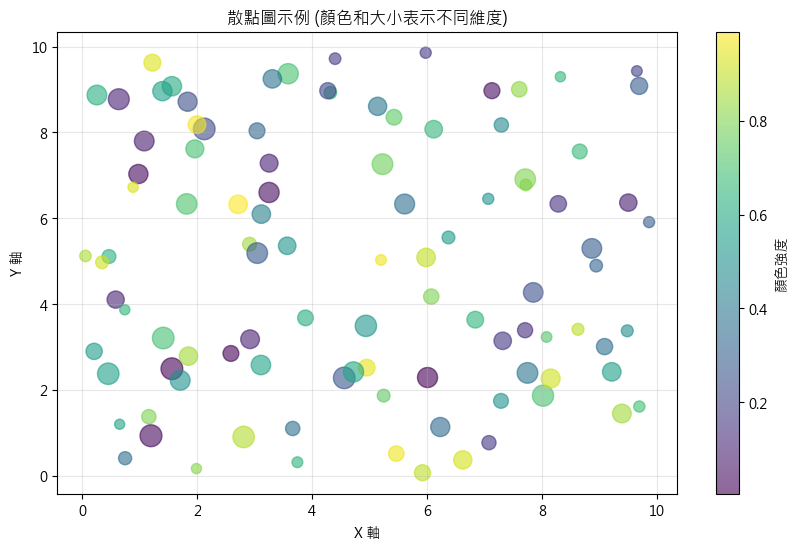

In [56]:
# 2.2 散點圖 (Scatter Plot)
# 生成隨機數據點
n = 100
x = np.random.rand(n) * 10
y = np.random.rand(n) * 10
colors = np.random.rand(n)
sizes = np.random.rand(n) * 200 + 50

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')

plt.colorbar(scatter, label='顏色強度')
plt.xlabel('X 軸')
plt.ylabel('Y 軸')
plt.title('散點圖示例 (顏色和大小表示不同維度)')
plt.grid(True, alpha=0.3)
plt.show()

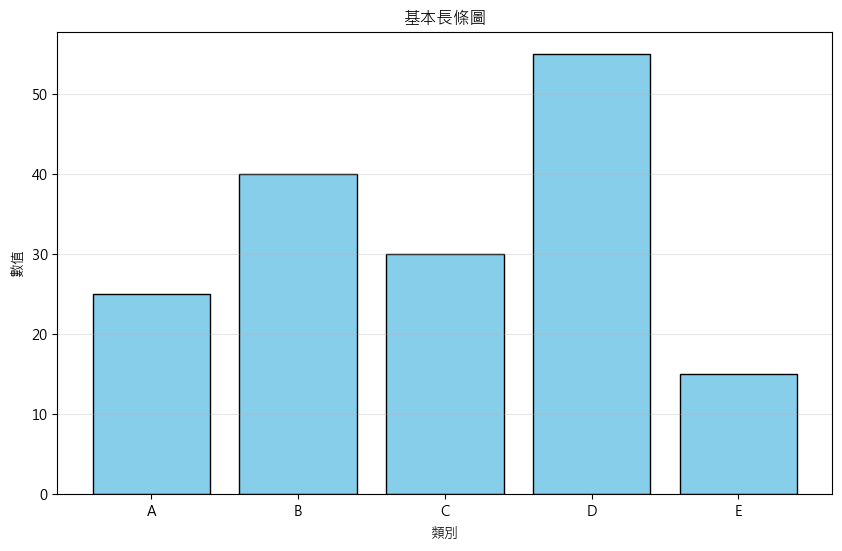

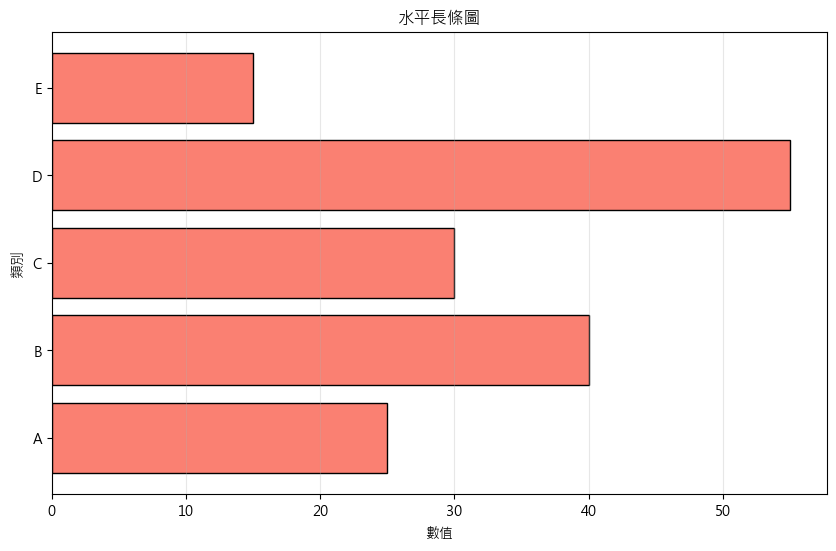

In [57]:
# 2.3 長條圖 (Bar Plot)
# 創建示例數據
categories = ['A', 'B', 'C', 'D', 'E']
values = [25, 40, 30, 55, 15]

# 基本長條圖
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue', edgecolor='black')
plt.xlabel('類別')
plt.ylabel('數值')
plt.title('基本長條圖')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# 水平長條圖
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color='salmon', edgecolor='black')
plt.xlabel('數值')
plt.ylabel('類別')
plt.title('水平長條圖')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

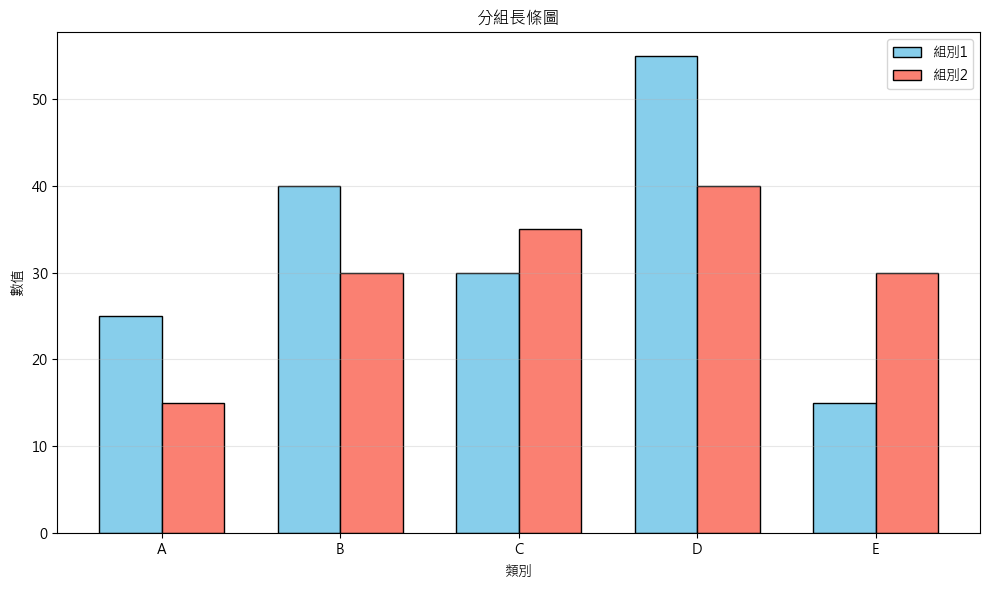

In [58]:
# 2.4 分組長條圖
# 創建示例數據
categories = ['A', 'B', 'C', 'D', 'E']
values1 = [25, 40, 30, 55, 15]
values2 = [15, 30, 35, 40, 30]

width = 0.35  # 長條寬度
x = np.arange(len(categories))  # 類別位置

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, values1, width, label='組別1', color='skyblue', edgecolor='black')
bar2 = ax.bar(x + width/2, values2, width, label='組別2', color='salmon', edgecolor='black')

ax.set_xlabel('類別')
ax.set_ylabel('數值')
ax.set_title('分組長條圖')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

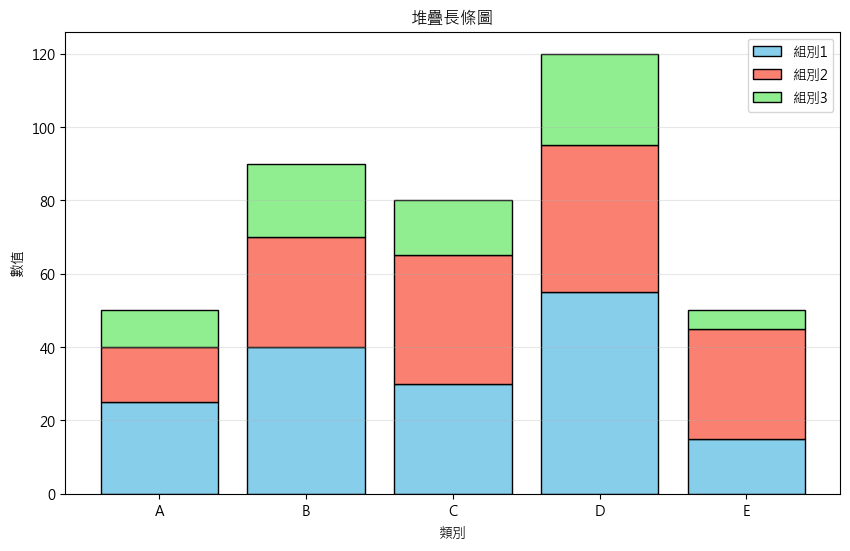

In [59]:
# 2.5 堆疊長條圖
# 創建示例數據
categories = ['A', 'B', 'C', 'D', 'E']
values1 = [25, 40, 30, 55, 15]
values2 = [15, 30, 35, 40, 30]
values3 = [10, 20, 15, 25, 5]

plt.figure(figsize=(10, 6))
plt.bar(categories, values1, color='skyblue', edgecolor='black', label='組別1')
plt.bar(categories, values2, bottom=values1, color='salmon', edgecolor='black', label='組別2')
plt.bar(categories, values3, bottom=np.array(values1) + np.array(values2), 
        color='lightgreen', edgecolor='black', label='組別3')

plt.xlabel('類別')
plt.ylabel('數值')
plt.title('堆疊長條圖')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()

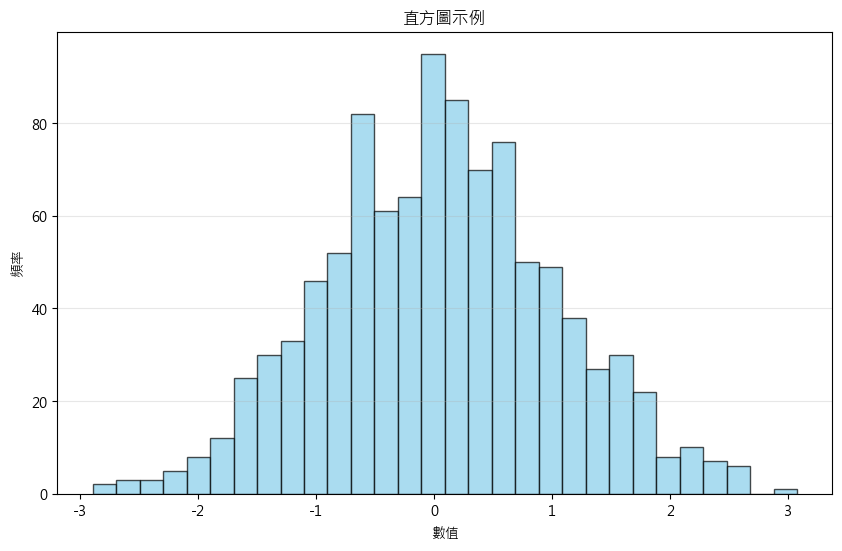

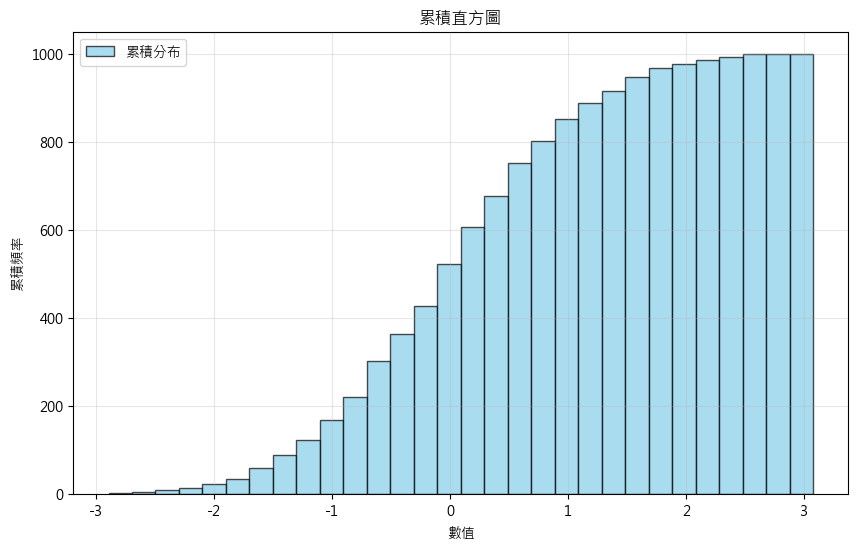

In [60]:
# 2.6 直方圖 (Histogram)
# 生成隨機數據
data = np.random.randn(1000)  # 1000個標準正態分布的隨機數

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('數值')
plt.ylabel('頻率')
plt.title('直方圖示例')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# 帶有累積分布的直方圖
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, 
         cumulative=True, label='累積分布')
plt.xlabel('數值')
plt.ylabel('累積頻率')
plt.title('累積直方圖')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

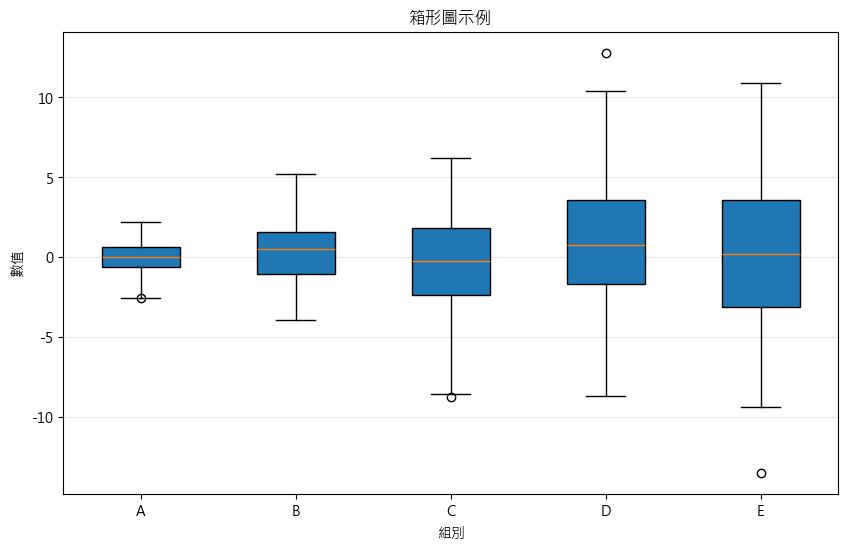

In [61]:
# 2.7 箱形圖 (Box Plot)
# 生成多組數據
data = [np.random.normal(0, std, 100) for std in range(1, 6)]
labels = ['A', 'B', 'C', 'D', 'E']

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)
plt.xlabel('組別')
plt.ylabel('數值')
plt.title('箱形圖示例')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## 📊 3. 多子圖繪製

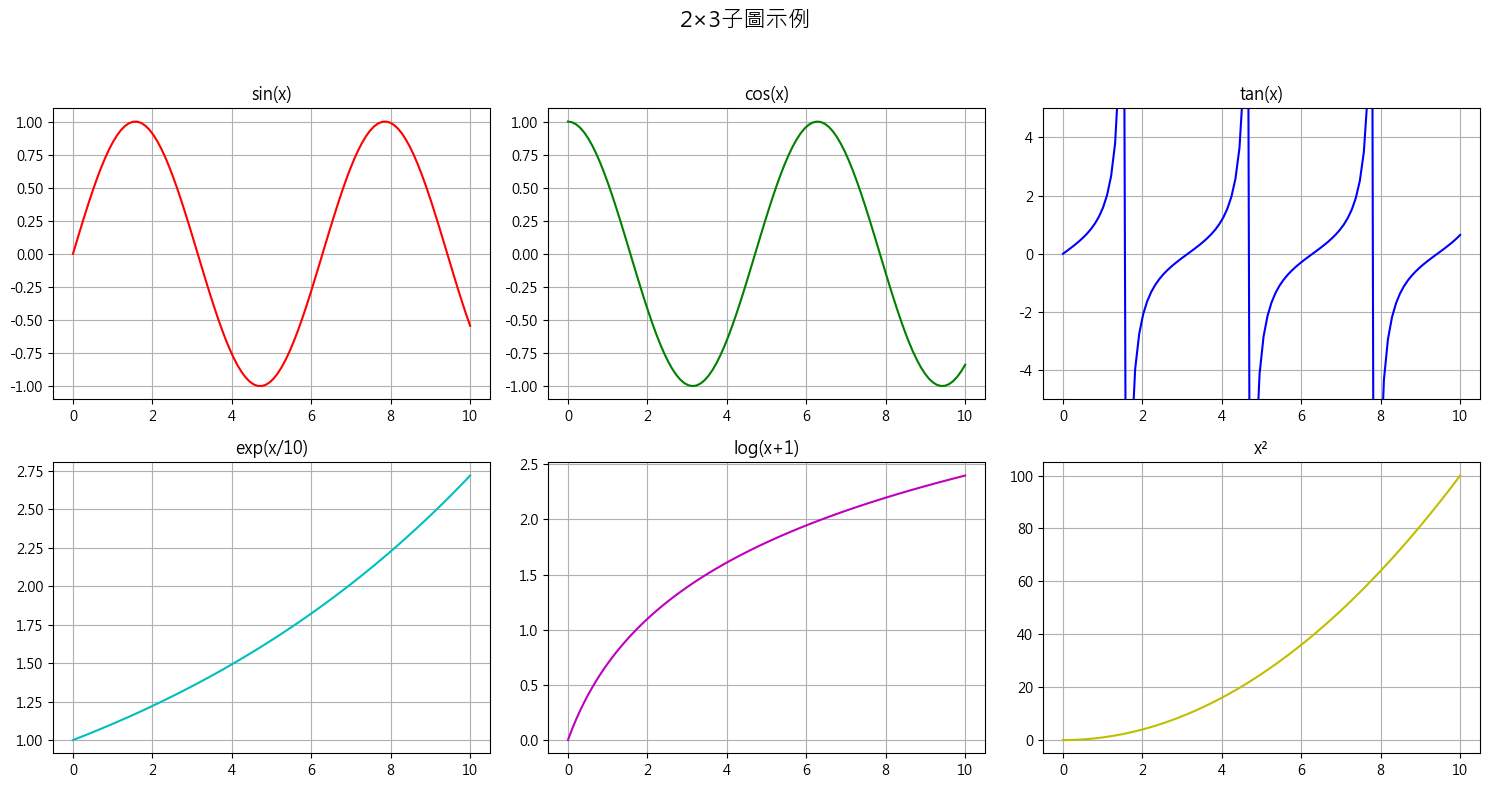

In [62]:
# 3.1 使用 subplots() 創建子圖
# 創建一個2行3列的子圖佈局
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('2×3子圖示例', fontsize=16)

# 在每個子圖上繪製不同的數據
x = np.linspace(0, 10, 100)

# 第一行
axes[0, 0].plot(x, np.sin(x), 'r-')
axes[0, 0].set_title('sin(x)')
axes[0, 0].grid(True)

axes[0, 1].plot(x, np.cos(x), 'g-')
axes[0, 1].set_title('cos(x)')
axes[0, 1].grid(True)

axes[0, 2].plot(x, np.tan(x), 'b-')
axes[0, 2].set_title('tan(x)')
axes[0, 2].set_ylim(-5, 5)  # 限制y軸範圍以便觀察
axes[0, 2].grid(True)

# 第二行
axes[1, 0].plot(x, np.exp(x/10), 'c-')
axes[1, 0].set_title('exp(x/10)')
axes[1, 0].grid(True)

axes[1, 1].plot(x, np.log(x+1), 'm-')
axes[1, 1].set_title('log(x+1)')
axes[1, 1].grid(True)

axes[1, 2].plot(x, x**2, 'y-')
axes[1, 2].set_title('x²')
axes[1, 2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 調整佈局，為總標題留出空間
plt.show()

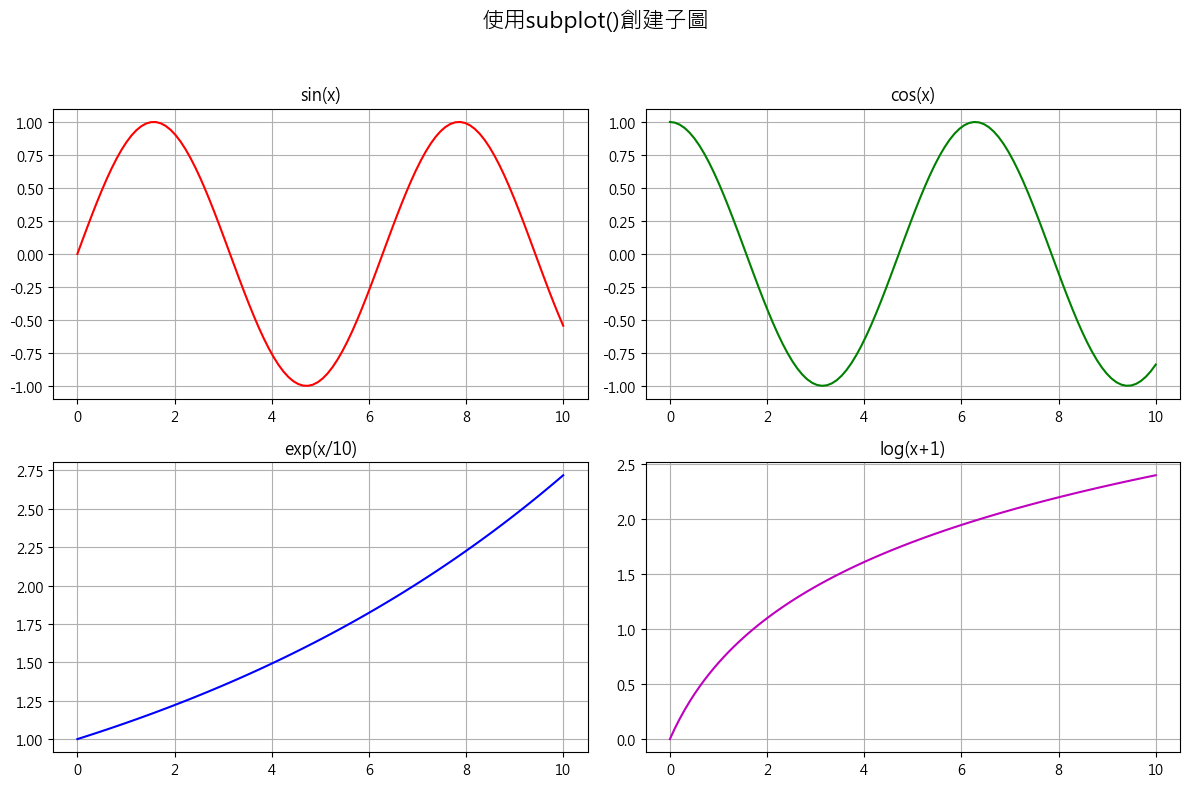

In [63]:
# 3.2 使用 subplot() 創建子圖
plt.figure(figsize=(12, 8))

# 2行2列的第1個子圖
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x), 'r-')
plt.title('sin(x)')
plt.grid(True)

# 2行2列的第2個子圖
plt.subplot(2, 2, 2)
plt.plot(x, np.cos(x), 'g-')
plt.title('cos(x)')
plt.grid(True)

# 2行2列的第3個子圖
plt.subplot(2, 2, 3)
plt.plot(x, np.exp(x/10), 'b-')
plt.title('exp(x/10)')
plt.grid(True)

# 2行2列的第4個子圖
plt.subplot(2, 2, 4)
plt.plot(x, np.log(x+1), 'm-')
plt.title('log(x+1)')
plt.grid(True)

plt.suptitle('使用subplot()創建子圖', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 調整佈局，為總標題留出空間
plt.show()

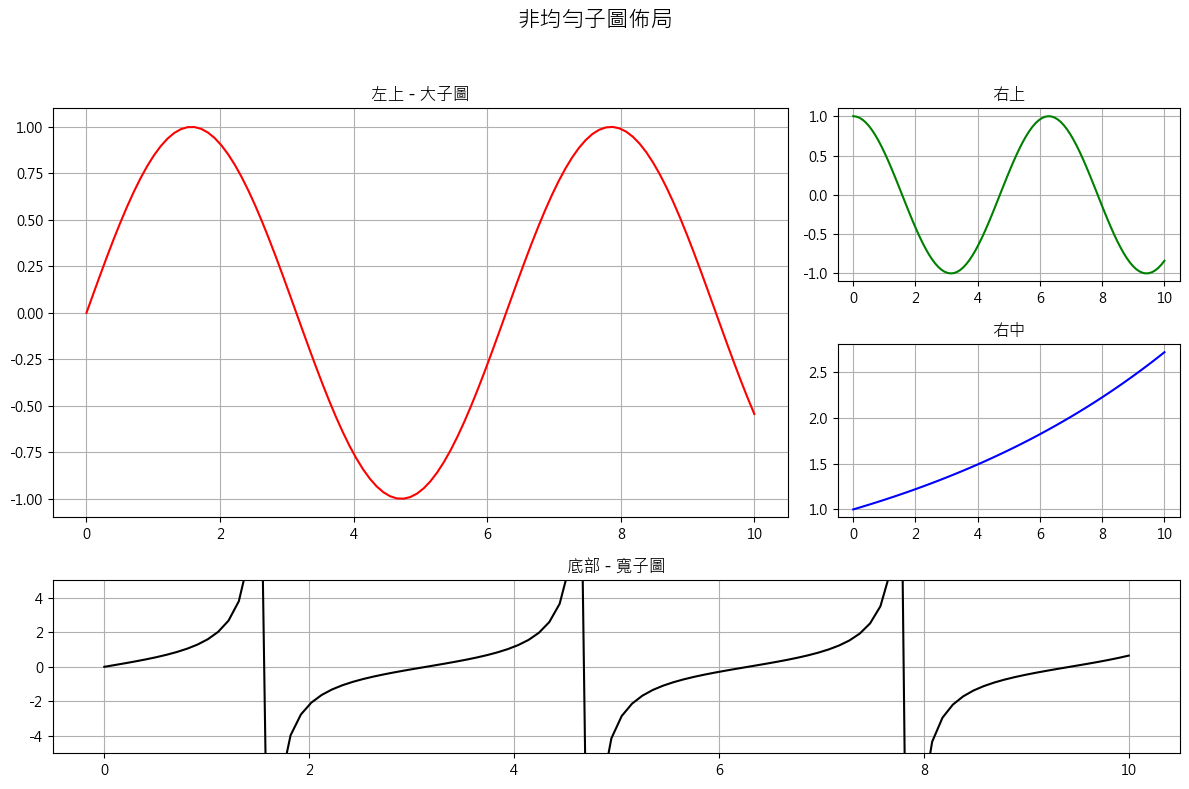

In [64]:
# 3.3 非均勻子圖佈局
plt.figure(figsize=(12, 8))

# 第一個子圖（跨越左側兩行）
plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
plt.plot(x, np.sin(x), 'r-')
plt.title('左上 - 大子圖')
plt.grid(True)

# 右上子圖
plt.subplot2grid((3, 3), (0, 2), rowspan=1)
plt.plot(x, np.cos(x), 'g-')
plt.title('右上')
plt.grid(True)

# 右中子圖
plt.subplot2grid((3, 3), (1, 2), rowspan=1)
plt.plot(x, np.exp(x/10), 'b-')
plt.title('右中')
plt.grid(True)

# 底部子圖（跨越所有列）
plt.subplot2grid((3, 3), (2, 0), colspan=3)
plt.plot(x, np.tan(x), 'k-')
plt.ylim(-5, 5)
plt.title('底部 - 寬子圖')
plt.grid(True)

plt.suptitle('非均勻子圖佈局', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 調整佈局，為總標題留出空間
plt.show()

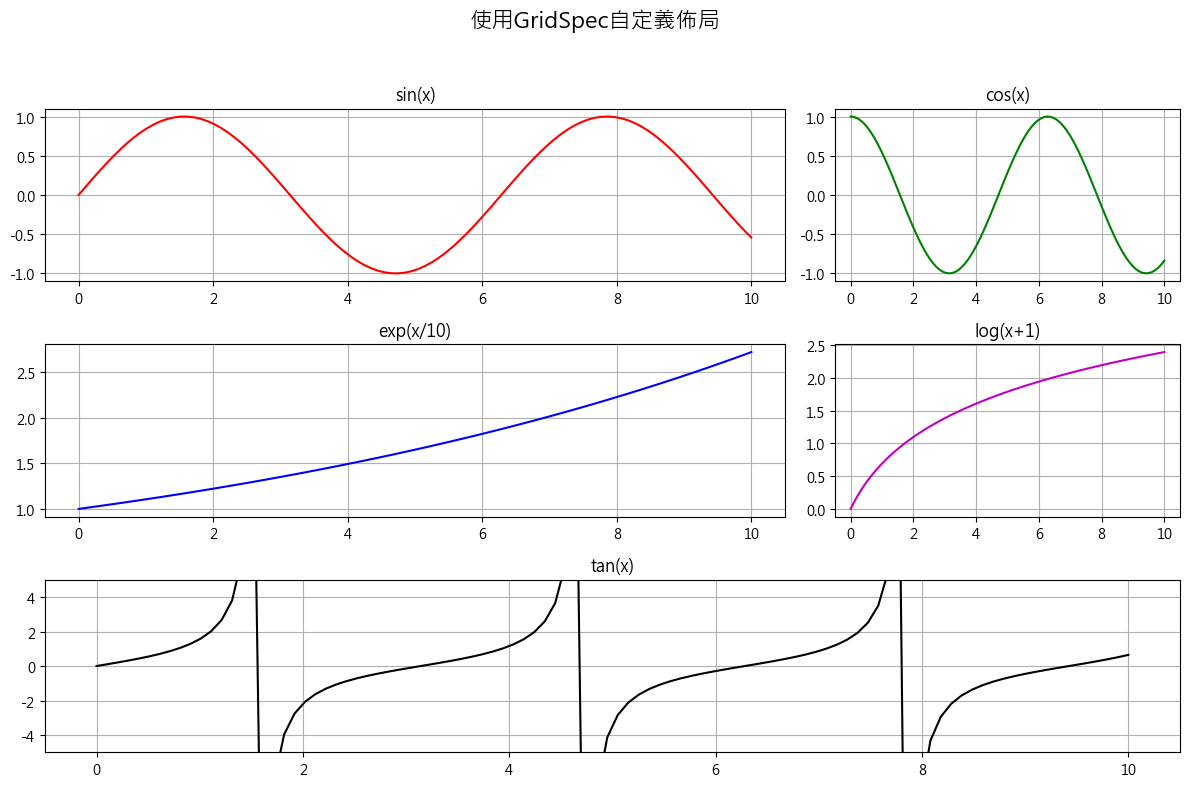

In [65]:
# 3.4 GridSpec 自定義佈局
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(3, 3, figure=fig)

# 創建子圖
ax1 = fig.add_subplot(gs[0, :2])  # 第一行，前兩列
ax2 = fig.add_subplot(gs[0, 2])   # 第一行，第三列
ax3 = fig.add_subplot(gs[1, :2])  # 第二行，前兩列
ax4 = fig.add_subplot(gs[1, 2])   # 第二行，第三列
ax5 = fig.add_subplot(gs[2, :])   # 第三行，所有列

# 繪製數據
ax1.plot(x, np.sin(x), 'r-')
ax1.set_title('sin(x)')
ax1.grid(True)

ax2.plot(x, np.cos(x), 'g-')
ax2.set_title('cos(x)')
ax2.grid(True)

ax3.plot(x, np.exp(x/10), 'b-')
ax3.set_title('exp(x/10)')
ax3.grid(True)

ax4.plot(x, np.log(x+1), 'm-')
ax4.set_title('log(x+1)')
ax4.grid(True)

ax5.plot(x, np.tan(x), 'k-')
ax5.set_ylim(-5, 5)
ax5.set_title('tan(x)')
ax5.grid(True)

plt.suptitle('使用GridSpec自定義佈局', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 調整佈局，為總標題留出空間
plt.show()

## 📊 4. 圖形顏色和樣式

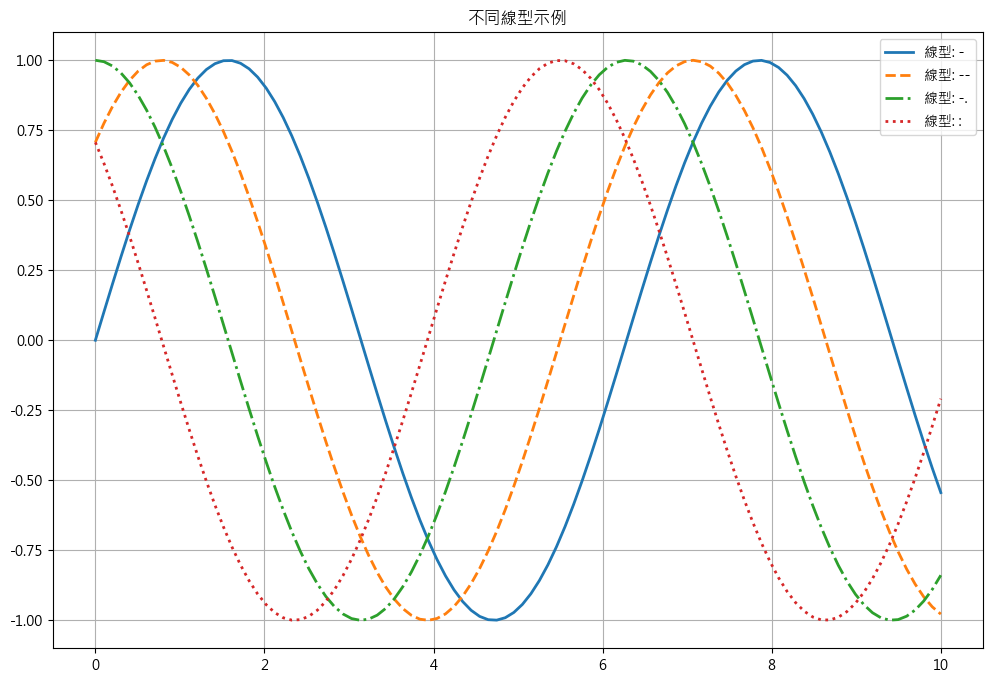

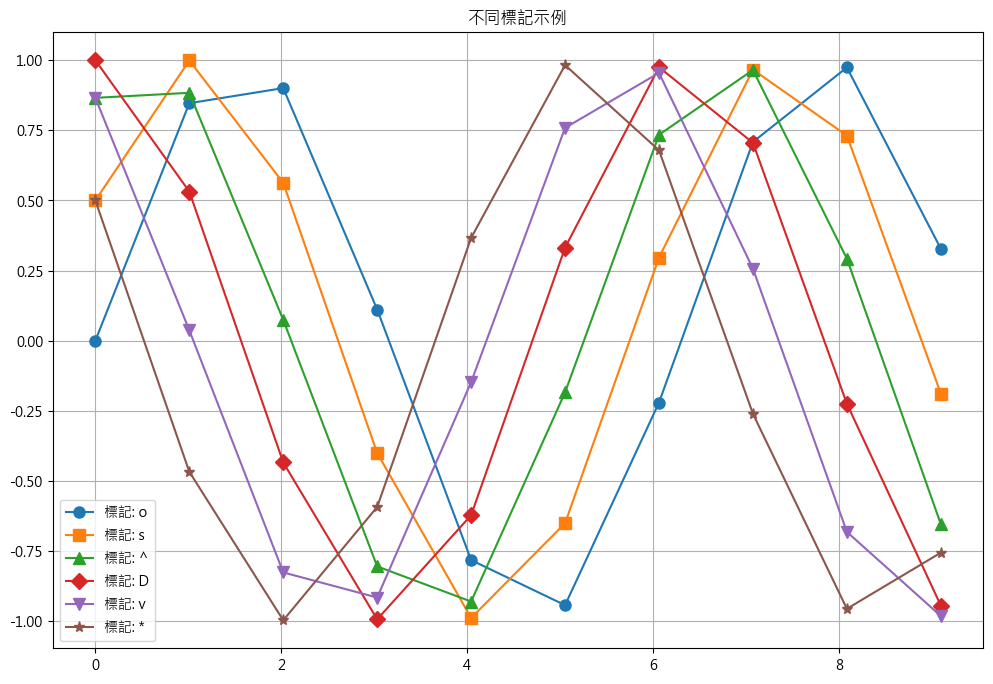

In [66]:
# 4.1 線型和標記
# 展示不同的線型和標記
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D', 'v', '*', '+', 'x']

plt.figure(figsize=(12, 8))

# 不同線型
for i, style in enumerate(line_styles):
    plt.plot(x, np.sin(x + i*np.pi/4), linestyle=style, linewidth=2, 
             label=f'線型: {style}')

plt.title('不同線型示例')
plt.legend()
plt.grid(True)
plt.show()

# 不同標記
plt.figure(figsize=(12, 8))
for i, marker in enumerate(markers[:6]):
    plt.plot(x[::10], np.sin(x[::10] + i*np.pi/6), marker=marker, linestyle='-', 
             markersize=8, label=f'標記: {marker}')

plt.title('不同標記示例')
plt.legend()
plt.grid(True)
plt.show()

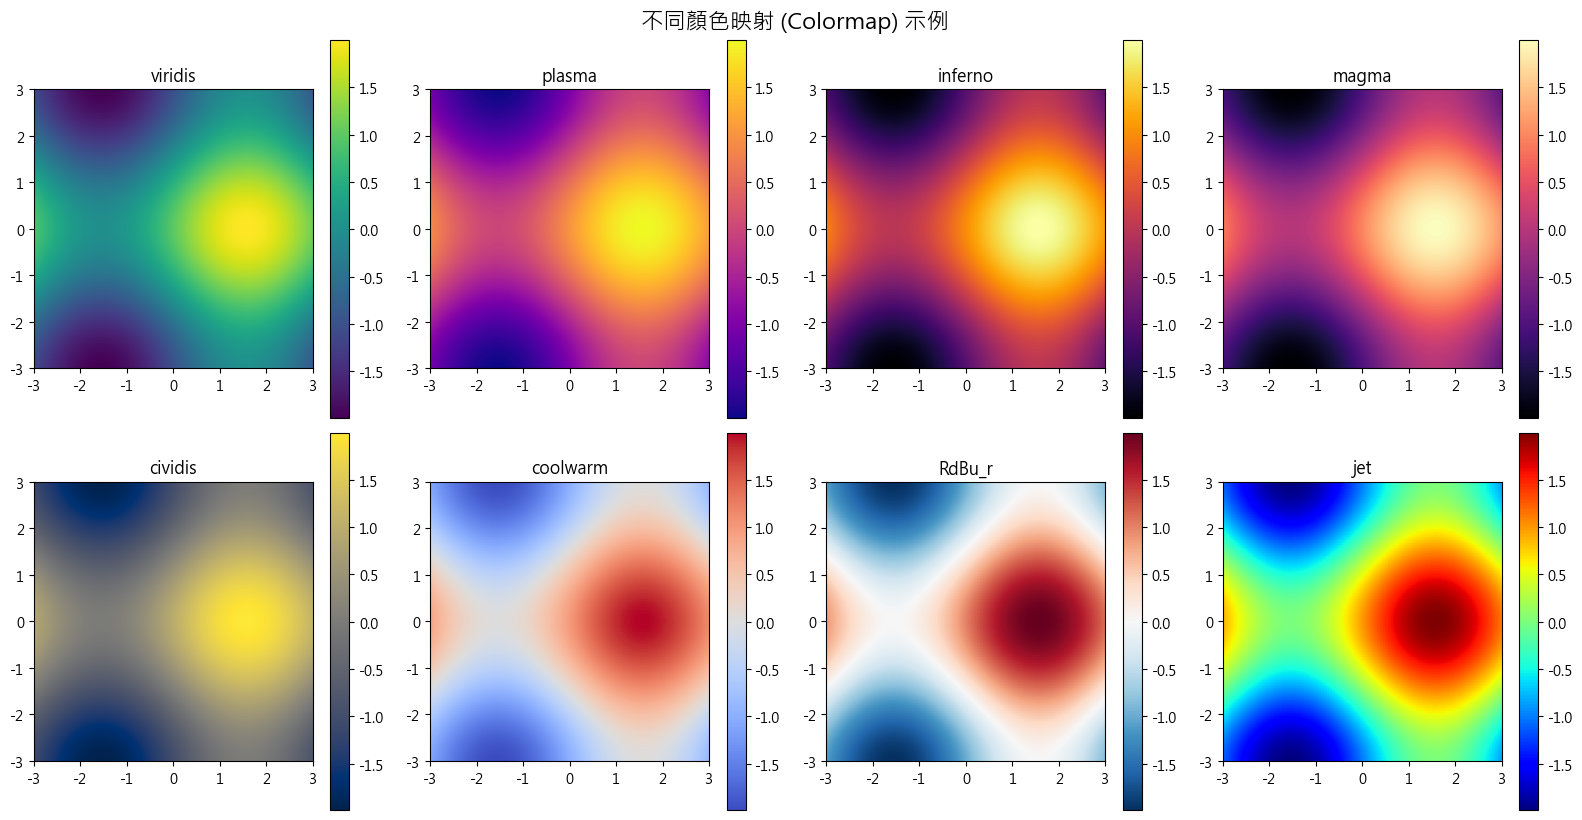

In [67]:
# 4.2 顏色映射 (Colormap)
# 展示不同的顏色映射

# 創建一個簡單的數據集合用來展示顏色映射
def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 展示不同的顏色映射
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 
         'coolwarm', 'RdBu_r', 'jet']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, cmap_name in enumerate(cmaps):
    im = axes[i].imshow(Z, cmap=cmap_name, extent=[-3, 3, -3, 3])
    axes[i].set_title(cmap_name)
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.suptitle('不同顏色映射 (Colormap) 示例', fontsize=16, y=1.02)
plt.show()

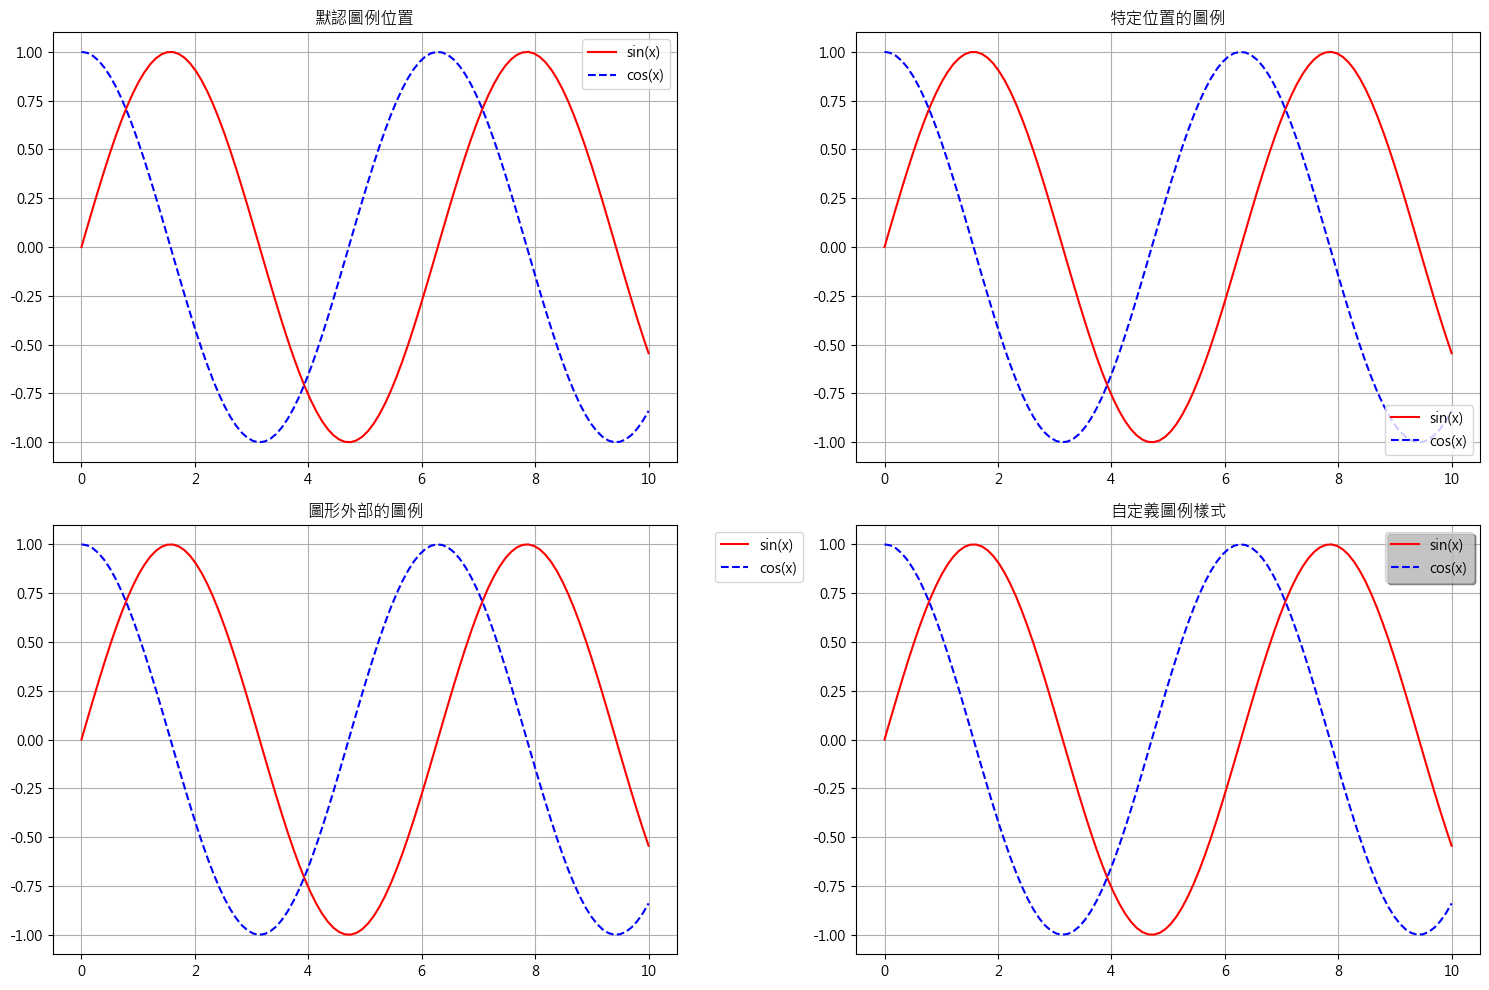

In [68]:
# 4.3 圖例 (Legend) 放置與樣式
x = np.linspace(0, 10, 100)

# 創建圖形
plt.figure(figsize=(15, 10))

# 子圖1：圖例放置在默認位置（右上角）
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x), 'r-', label='sin(x)')
plt.plot(x, np.cos(x), 'b--', label='cos(x)')
plt.title('默認圖例位置')
plt.grid(True)
plt.legend()  # 默認位置

# 子圖2：圖例放置在特定位置
plt.subplot(2, 2, 2)
plt.plot(x, np.sin(x), 'r-', label='sin(x)')
plt.plot(x, np.cos(x), 'b--', label='cos(x)')
plt.title('特定位置的圖例')
plt.grid(True)
plt.legend(loc='lower right')  # 右下角

# 子圖3：圖例放在圖形外部
plt.subplot(2, 2, 3)
plt.plot(x, np.sin(x), 'r-', label='sin(x)')
plt.plot(x, np.cos(x), 'b--', label='cos(x)')
plt.title('圖形外部的圖例')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 圖形右側

# 子圖4：自定義圖例樣式
plt.subplot(2, 2, 4)
plt.plot(x, np.sin(x), 'r-', label='sin(x)')
plt.plot(x, np.cos(x), 'b--', label='cos(x)')
plt.title('自定義圖例樣式')
plt.grid(True)
plt.legend(frameon=True, shadow=True, fancybox=True, 
           framealpha=0.7, facecolor='lightgray')

plt.tight_layout()
plt.show()

## 📋 5. 總結


在本課程中，我們學習了Matplotlib的基礎知識和核心概念：

- **Matplotlib的架構**：了解了Figure和Axes對象的關係，以及pyplot和面向對象兩種繪圖接口
- **基本圖形繪製**：掌握了線形圖、散點圖、長條圖、直方圖、箱形圖等基本圖表的繪製方法
- **多子圖繪製**：學習了使用subplots()、subplot()和GridSpec創建複雜的子圖佈局
- **圖形樣式**：探索了線型、標記、顏色映射等圖形樣式的自定義方法

這些基礎知識為使用Matplotlib創建專業級數據可視化提供了堅實的基礎。在接下來的課程中，我們將進一步探索更多專業圖表類型和美化技巧。